In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [27]:
def get_speed(mark):
#     "VW", "Honda", "Hyundai", "Skoda", "Vaz"
    if mark == "VW":
        sp = randint(80,140)
    elif mark == "Honda":
        sp =randint(80,130)
    elif mark == "Hyundai":
        sp = randint(80,120)
    elif mark == "Skoda":
        sp = randint(80,110)
    elif mark == "Vaz":
        sp = randint(80,100)    
    return sp

In [44]:
# Создаём сэмпл
n_samples = 1000
REPLACE_WITH = "n/a"
REPLACE_COUNT = int(n_samples/10)

driving_exp = np.random.choice(20, n_samples)
travel_time = np.random.choice(np.arange(3,6,0.2), n_samples)
stop_time =np.random.choice(range(5,30), n_samples)/60
stop_time = np.asarray(list(map(lambda x: round(x,2), stop_time)))
car_mark = np.random.choice(["VW", "Honda", "Hyundai", "Skoda", "Vaz"], n_samples)
breakage = np.random.choice(2, n_samples)
fix_time = list(map(lambda x: round(randint(5,120)/60,2) if x!=0 else 0,breakage))
average_speed =  [get_speed(mark) for mark in car_mark]
distance = map(int,(average_speed*travel_time - average_speed*stop_time - average_speed*breakage*fix_time) *1.5 + 22)

data_init = pd.DataFrame({'driving_exp':driving_exp,'travel_time': travel_time, 'stop_time': stop_time, 'car_mark':car_mark, 
                     'breakage': breakage, 'fix_time': fix_time, "average_speed":average_speed, "distance":distance })


# add missing values
data_init.breakage.iloc[np.random.choice(n_samples-1, REPLACE_COUNT, replace=False)] = None
data_init.driving_exp.iloc[np.random.choice(n_samples-1, 800, replace=False)] = None
data_init.average_speed.iloc[np.random.choice(n_samples-1, REPLACE_COUNT, replace=False)] = None
data_init.stop_time.iloc[np.random.choice(n_samples-1, REPLACE_COUNT, replace=False)] = None
data_init.head(20)



,driving_exp,travel_time,stop_time,car_mark,breakage,fix_time,average_speed,distance
0,12.0,5.2,0.12,Hyundai,1.0,0.78,91.0,608
1,16.0,5.8,0.08,Honda,0.0,0.00,122.0,1068
2,NaN,3.4,0.22,Skoda,1.0,0.22,103.0,479
3,NaN,4.4,0.42,Skoda,1.0,1.03,85.0,398
4,NaN,5.6,0.33,VW,1.0,1.00,139.0,912
5,8.0,3.2,NaN,Hyundai,0.0,0.00,87.0,423
6,NaN,4.8,0.37,Vaz,1.0,0.92,99.0,543
7,NaN,5.4,0.37,Hyundai,0.0,0.00,120.0,927
8,7.0,5.4,NaN,Honda,1.0,0.35,81.0,578
9,NaN,3.4,0.40,VW,1.0,0.33,118.0,494


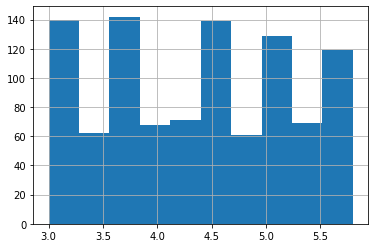

In [69]:
data_init.travel_time.hist(bins=10)


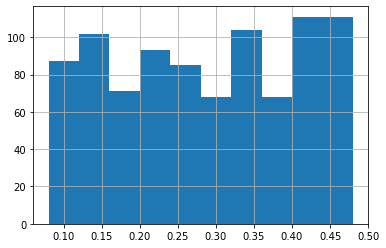

In [70]:
data_init.stop_time.hist(bins=10)


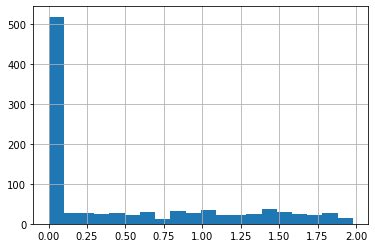

In [71]:
data_init.fix_time.hist(bins=20)


In [67]:
print(data_init.fix_time.mean(), data_init.fix_time.max())
data_init.fix_time[data_init["fix_time"].values>1.5].count()
#не выброс, у определённого кол-ва машин была сложная поломка

0.49765000000000037 1.98


114

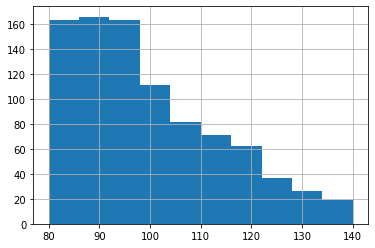

In [72]:
data_init.average_speed.hist(bins=10)

In [29]:
data = data_init.copy()
data


,driving_exp,travel_time,stop_time,car_mark,breakage,fix_time,average_speed,distance
0,NaN,4.6,0.15,Hyundai,0.0,0.00,103.0,709
1,NaN,5.8,0.27,Vaz,0.0,0.00,86.0,735
2,NaN,3.2,NaN,VW,1.0,0.92,97.0,339
3,NaN,4.8,0.22,Hyundai,1.0,1.22,84.0,445
4,4.0,3.6,0.37,Skoda,1.0,1.50,88.0,250
...,...,...,...,...,...,...,...,...
995,5.0,3.0,0.42,Vaz,NaN,1.12,98.0,236
996,7.0,5.0,0.33,Vaz,1.0,1.20,NaN,438
997,7.0,4.0,0.12,Hyundai,1.0,0.35,106.0,583
998,NaN,4.8,NaN,Hyundai,0.0,0.00,115.0,768


 driving_exp  слишком много пропусков заменю индикатором

In [30]:
data['driving_exp_ind'] = data['driving_exp'].apply(lambda x: 1 if np.isnan(x) else 0)
data = data.drop(columns=['driving_exp'])

Заменяю пропуски в breakage модай

In [31]:
print(data['breakage'].mode()[0])
data.breakage.fillna(data['breakage'].mode()[0], inplace=True)
data

1.0


,travel_time,stop_time,car_mark,breakage,fix_time,average_speed,distance,driving_exp_ind
0,4.6,0.15,Hyundai,0.0,0.00,103.0,709,1
1,5.8,0.27,Vaz,0.0,0.00,86.0,735,1
2,3.2,NaN,VW,1.0,0.92,97.0,339,1
3,4.8,0.22,Hyundai,1.0,1.22,84.0,445,1
4,3.6,0.37,Skoda,1.0,1.50,88.0,250,0
...,...,...,...,...,...,...,...,...
995,3.0,0.42,Vaz,1.0,1.12,98.0,236,0
996,5.0,0.33,Vaz,1.0,1.20,NaN,438,0
997,4.0,0.12,Hyundai,1.0,0.35,106.0,583,0
998,4.8,NaN,Hyundai,0.0,0.00,115.0,768,1


замена пропусков в stop_time

In [32]:
data.stop_time.mean(), data.stop_time.std(), data.stop_time.median()

(0.28911111111111115, 0.1205977367716665, 0.3)

In [33]:
data.stop_time.fillna(data['stop_time'].median(), inplace=True)
data.stop_time.mean(), data.stop_time.std()
# статистики изменились незначительно

(0.2902000000000012, 0.11444937159573516)

In [34]:
#one hot encoding for car_mark
dummies = pd.get_dummies(data.car_mark)
cols = dummies.columns
for col in cols:
    data[col] = dummies[col]
data = data.drop(columns=['car_mark'])
data

,travel_time,stop_time,breakage,fix_time,average_speed,distance,driving_exp_ind,Honda,Hyundai,Skoda,VW,Vaz
0,4.6,0.15,0.0,0.00,103.0,709,1,0,1,0,0,0
1,5.8,0.27,0.0,0.00,86.0,735,1,0,0,0,0,1
2,3.2,0.30,1.0,0.92,97.0,339,1,0,0,0,1,0
3,4.8,0.22,1.0,1.22,84.0,445,1,0,1,0,0,0
4,3.6,0.37,1.0,1.50,88.0,250,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,0.42,1.0,1.12,98.0,236,0,0,0,0,0,1
996,5.0,0.33,1.0,1.20,NaN,438,0,0,0,0,0,1
997,4.0,0.12,1.0,0.35,106.0,583,0,0,1,0,0,0
998,4.8,0.30,0.0,0.00,115.0,768,1,0,1,0,0,0


замена пропусков в average_speed на основании модели

In [35]:
cols = ["Honda", "Hyundai", "Skoda","VW", "Vaz"]
Xtmp = data[cols]
Xtmp["average_speed"] = data["average_speed"]
Xtmp = Xtmp.dropna() 
Ytmp = Xtmp["average_speed"]
Xtmp = Xtmp[cols]
model = LinearRegression().fit(Xtmp, Ytmp)
data.loc[data[data["average_speed"].isna()].index,["average_speed"]]=model.predict(data[data["average_speed"].isna()][cols])
data



<ipython-input-35-acc2183dfa3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtmp["average_speed"] = data["average_speed"]


,travel_time,stop_time,breakage,fix_time,average_speed,distance,driving_exp_ind,Honda,Hyundai,Skoda,VW,Vaz
0,4.6,0.15,0.0,0.00,103.000000,709,1,0,1,0,0,0
1,5.8,0.27,0.0,0.00,86.000000,735,1,0,0,0,0,1
2,3.2,0.30,1.0,0.92,97.000000,339,1,0,0,0,1,0
3,4.8,0.22,1.0,1.22,84.000000,445,1,0,1,0,0,0
4,3.6,0.37,1.0,1.50,88.000000,250,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,0.42,1.0,1.12,98.000000,236,0,0,0,0,0,1
996,5.0,0.33,1.0,1.20,89.934426,438,0,0,0,0,0,1
997,4.0,0.12,1.0,0.35,106.000000,583,0,0,1,0,0,0
998,4.8,0.30,0.0,0.00,115.000000,768,1,0,1,0,0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   travel_time      1000 non-null   float64
 1   stop_time        1000 non-null   float64
 2   breakage         1000 non-null   float64
 3   fix_time         1000 non-null   float64
 4   average_speed    1000 non-null   float64
 5   distance         1000 non-null   int64  
 6   driving_exp_ind  1000 non-null   int64  
 7   Honda            1000 non-null   uint8  
 8   Hyundai          1000 non-null   uint8  
 9   Skoda            1000 non-null   uint8  
 10  VW               1000 non-null   uint8  
 11  Vaz              1000 non-null   uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 59.7 KB


In [37]:
y = data['distance']
X = data[["travel_time","stop_time", "breakage", "fix_time", "average_speed", "driving_exp_ind", "Honda", "Hyundai", "Skoda",
         "Vaz", "VW"]]
# print(X)
# print(y)
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )  
model.fit(X_train, y_train)
y_pred = model.predict( X_test )
r2_score(y_pred, y_test)
# модель неплохо обучает


0.9723647719910371

дабавлю признак = average_speed х travel_time

In [38]:
data["time_speed"] = data["travel_time"] * data["average_speed"]

повторю обучение

In [39]:
y = data['distance']
X = data[["travel_time","stop_time", "breakage", "fix_time", "average_speed", "driving_exp_ind", "Honda", "Hyundai", "Skoda",
         "Vaz", "VW", "time_speed"]]
# print(X)
# print(y)
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )  
model.fit(X_train, y_train)
y_pred = model.predict( X_test )
r2_score(y_pred, y_test)
# модель стала обучать немного лучше

0.9807480658704797